# Project presentation

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

import librosa as lb
import librosa.display
import pyaudio as pa
import IPython.display as ipd


## Data exploration

In [2]:
files_a_path=os.path.join("..","data","heartbeat_sounds","set_a")
files_a_list=glob.glob(files_a_path+"/*.wav")
targets_a=pd.read_csv(os.path.join("..","data","heartbeat_sounds","set_a.csv"))
targets_a_timing=pd.read_csv(os.path.join("..","data","heartbeat_sounds","set_a_timing.csv"))
targets_b=pd.read_csv(os.path.join("..","data","heartbeat_sounds","set_b.csv"))
files_b_path=os.path.join("..","data","heartbeat_sounds","set_b")
files_b_list=glob.glob(files_b_path+"/*.wav")

In [3]:
x,sr=lb.load(files_a_list[0])
ipd.Audio(files_a_list[0])

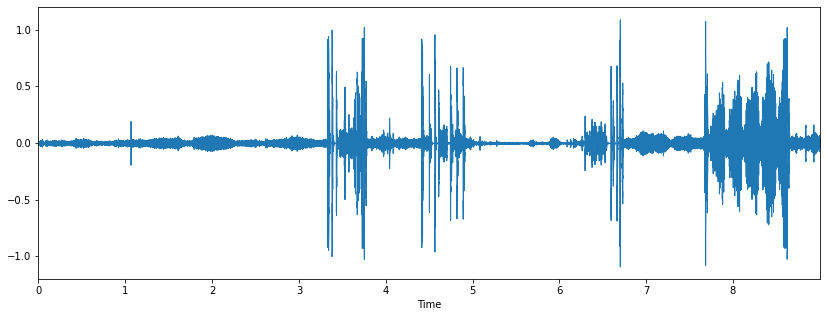

In [4]:
%matplotlib inline

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

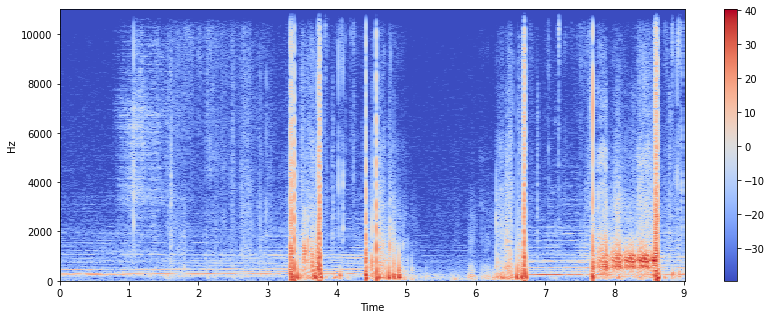

In [5]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

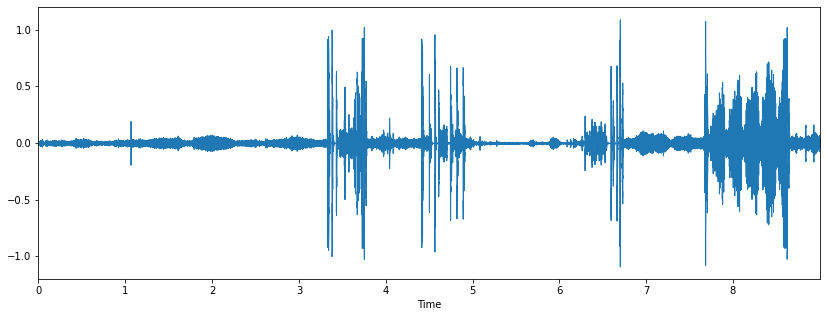

In [6]:
x, sr = librosa.load(files_a_list[0])
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

(20, 388)


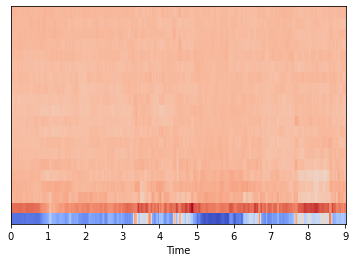

In [7]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [8]:
x.shape

(198450,)

In [9]:
targets_a_timing.head(40)

,fname,cycle,sound,location
0,set_a/normal__201102081321.wav,1,S1,10021
1,set_a/normal__201102081321.wav,1,S2,20759
2,set_a/normal__201102081321.wav,2,S1,35075
3,set_a/normal__201102081321.wav,2,S2,47244
4,set_a/normal__201102081321.wav,3,S1,62992
5,set_a/normal__201102081321.wav,3,S2,73729
6,set_a/normal__201102081321.wav,4,S1,88761
7,set_a/normal__201102081321.wav,4,S2,101646
8,set_a/normal__201102081321.wav,5,S1,115246
9,set_a/normal__201102081321.wav,5,S2,127415


## Heartbeat S1 and S2 sounds segmentation

../data/heartbeat_sounds/set_a/normal__201102081321.wav


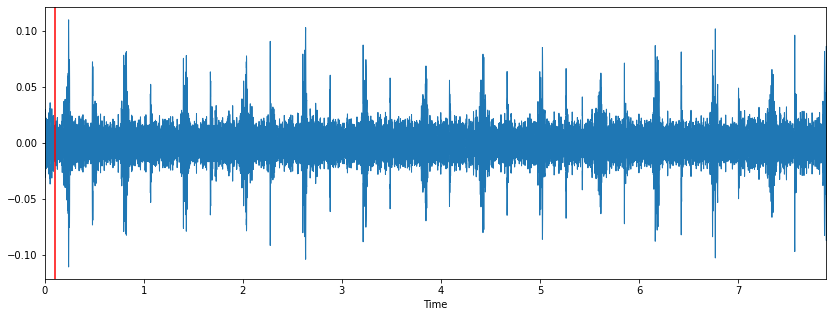

In [10]:
plt.figure(figsize=(14, 5))
sample=[a for a in files_a_list if "normal__201102081321" in a][0]
print(sample)
x,sr=lb.load(sample)
librosa.display.waveplot(x, sr=sr)
plt.axvline(x=targets_a_timing["location"][0]/100000,c="r")

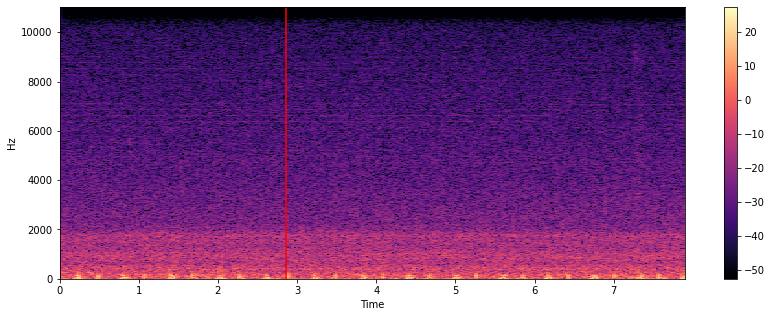

In [11]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.axvline(x=targets_a_timing["location"][4]/sr,c="r")
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

A potential extra step is filtering out high-frequency noise as the heartbeats are low-frequency sounds

In [12]:
import numpy as np
from scipy.signal import butter,filtfilt

cutoff = 100      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
order = 2       # sin wave can be approx represented as quadratic

def butter_lowpass_filter(data, cutoff, sr, order):
    nyq = 0.5 * sr
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

filtered=butter_lowpass_filter(x,cutoff,sr,order)
filtered

array([0.01255684, 0.01242513, 0.01229539, ..., 0.05630766, 0.0563281 ,
       0.05634462])

Normalize the sound

In [13]:
from sklearn.preprocessing import StandardScaler

def normalize_sound(sound):
    sc=StandardScaler()
    norm=sc.fit_transform(sound.reshape(len(sound),1))
    return norm

Segment the input into overlapping lengths of sound, padding the extremities

In [14]:
from tqdm import tqdm
def rolling_window(sound,window_length=4096):
    new_array=[]
    half_window=np.int(window_length/2)
    for i in tqdm(range(len(sound))):
        if i < window_length/2:
            subsegment=np.zeros(window_length)
            subsegment[half_window-i:]=sound[0:i+half_window]
            
        elif i > (len(sound)-half_window):
            subsegment=np.zeros(window_length)
            subsegment[:i+half_window]=sound[i-window_length:i]
        
        else:
            subsegment=sound[i-half_window:i+half_window]
        
        new_array.append(subsegment)
    
    return new_array

rw=rolling_window(x)

100%|██████████| 173943/173943 [00:00<00:00, 709864.00it/s]


Apply FFT to windows

In [15]:
def rolling_stft(window_array,window_length=1024):
    stft_array=[]
    for i in tqdm(range(len(window_array))):
        X = librosa.stft(window_array[i],n_fft=window_length)
        Xdb = librosa.amplitude_to_db(abs(X))
        stft_array.append(Xdb)
        
    return stft_array

rstft=rolling_stft(rw)

100%|██████████| 173943/173943 [02:07<00:00, 1363.38it/s]


In [16]:
from librosa.feature import mfcc
def rolling_mfcc(window_array,sr=22050):
    
    mfcc_array=[]
    for i in tqdm(range(len(window_array))):
        mfcc_out=mfcc(window_array[i],sr=sr)
        mfcc_out=mfcc_out.mean(axis=1).reshape(1,mfcc_out.shape[0])
        mfcc_array.append(mfcc_out)
        
    return mfcc_array

rmfcc=rolling_mfcc(rw,sr)
rmfcc=np.array(rmfcc)

100%|██████████| 173943/173943 [41:08<00:00, 70.47it/s]  


In [71]:
import pickle

with open("rmfcc.pkl","wb") as f:
    pickle.dump(rmfcc,f)

In [53]:
rmfcc=np.array(rmfcc)
rmfcc=rmfcc.reshape(rmfcc.shape[0],rmfcc.shape[2])

IndexError: tuple index out of range

In [217]:
import pickle

with open("rmfcc.pkl","rb") as f:
    rmfcc=pickle.load(f)
    
y=np.zeros(len(rmfcc),dtype=np.int8).reshape(len(rmfcc),1)
for ind,series in targets_a_timing.iterrows():
    if "normal__201102081321" in series["fname"]:
        index=int(series["location"]*10000/sr)
        #print(index)
        if series["sound"]=="S1":
            y[index]=1
        elif series["sound"]=="S2":
            y[index]=2

In [219]:
df=pd.concat([pd.DataFrame(rmfcc).reset_index(),pd.DataFrame(y,columns=["y"]).reset_index()],axis=1).drop(["index"],axis=1)

In [220]:
df.groupby(["y"]).mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
y,,,,,,,,,,,,,,,,,,,,
0,-339.220125,125.137759,-3.586361,14.343725,6.742472,21.577775,1.225017,8.092157,1.391704,10.681205,-3.676145,-0.162320,-1.505569,11.326679,2.532407,4.866648,-0.465747,6.691136,-0.981219,1.626071
1,-333.670114,126.455677,-3.976316,16.001858,7.876120,23.015082,4.528785,11.477477,2.169645,9.843508,-3.807242,-0.905420,-1.611205,12.080187,3.958502,3.622345,-0.255177,7.112230,-2.826366,1.229997
2,-333.657337,126.392976,-3.876488,15.877450,7.819700,22.786015,4.373120,11.381478,2.393140,9.926654,-3.726616,-0.957867,-1.364941,12.131084,4.006653,3.511112,-0.248768,7.137223,-2.640106,1.144777


Rebuild a 2D array collecting FFT along time

(array([86959.,     0.,     0.,     0.,     0.,  4393.,     0.,     0.,
            0.,  4304.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

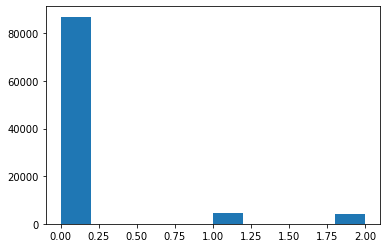

In [218]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
from sklearn.cluster import KMeans,DBSCAN,OPTICS
from sklearn.metrics import silhouette_samples
from sklearn.utils import resample

df=pd.concat([pd.DataFrame(rmfcc).reset_index(),pd.DataFrame(y,columns=["y"]).reset_index()],axis=1)
# Separate majority and minority classes
df_majority = df[df.y==0]
df_minority= df[df.y!=0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                     # sample with replacement
                               n_samples=np.int(len(df)/10),  
                              random_state=123) # reproducible results
 
# Combine majority clasplot multiple vertical liness with upsampled minority class
df_up = pd.concat([df_majority, df_minority_upsampled])
y=df_up.y
df_up.drop(["y","index"],axis=1,inplace=True)


# first we perform mean normalization
X_centered = df_up - df_up.mean(axis=0)

pca = PCA(n_components=0.9) 
pca.fit(X_centered)
X_pca = pca.transform(X_centered)
X_train,X_test,y_train,y_test=tts(X_pca,y,train_size=0.5,shuffle=True,stratify=y)
plt.hist(y_train)

In [159]:
from sklearn.metrics import accuracy_score as acc


Apply a first round of alorigthms

In [221]:
import lightgbm as lgb

lg = lgb.LGBMClassifier()
lg.fit(X_train,y_train)
y_predict=lg.predict(X_train)
y_predict_test=lg.predict(X_test)
print(acc(y_train,y_predict))
print(acc(y_test,y_predict_test))

1.0
0.9999895459819982


In [183]:
import catboost as cb

cb = cb.CatBoostClassifier(iterations=20)
cb.fit(X_train,y_train)
y_predict=cb.predict(X_train)
y_predict_test=cb.predict(X_test)
print(acc(y_train,y_predict))
print(acc(y_test,y_predict_test))

Learning rate set to 0.5
0:	learn: 0.5521805	total: 21ms	remaining: 399ms
1:	learn: 0.4239603	total: 43.6ms	remaining: 393ms
2:	learn: 0.3607085	total: 61.1ms	remaining: 346ms
3:	learn: 0.3207389	total: 76.9ms	remaining: 308ms
4:	learn: 0.2935261	total: 92.4ms	remaining: 277ms
5:	learn: 0.2732019	total: 106ms	remaining: 247ms
6:	learn: 0.2471588	total: 118ms	remaining: 219ms
7:	learn: 0.2254895	total: 130ms	remaining: 194ms
8:	learn: 0.2111540	total: 141ms	remaining: 172ms
9:	learn: 0.1840025	total: 155ms	remaining: 155ms
10:	learn: 0.1626942	total: 170ms	remaining: 139ms
11:	learn: 0.1424632	total: 183ms	remaining: 122ms
12:	learn: 0.1201363	total: 197ms	remaining: 106ms
13:	learn: 0.1043128	total: 210ms	remaining: 89.8ms
14:	learn: 0.0893462	total: 233ms	remaining: 77.8ms
15:	learn: 0.0783181	total: 253ms	remaining: 63.1ms
16:	learn: 0.0677943	total: 268ms	remaining: 47.3ms
17:	learn: 0.0633868	total: 281ms	remaining: 31.2ms
18:	learn: 0.0602883	total: 295ms	remaining: 15.5ms
19:	lea

In [222]:
y_test=np.array(y_test).reshape(y_test.shape[0],1)

../data/heartbeat_sounds/set_a/normal__201102081321.wav


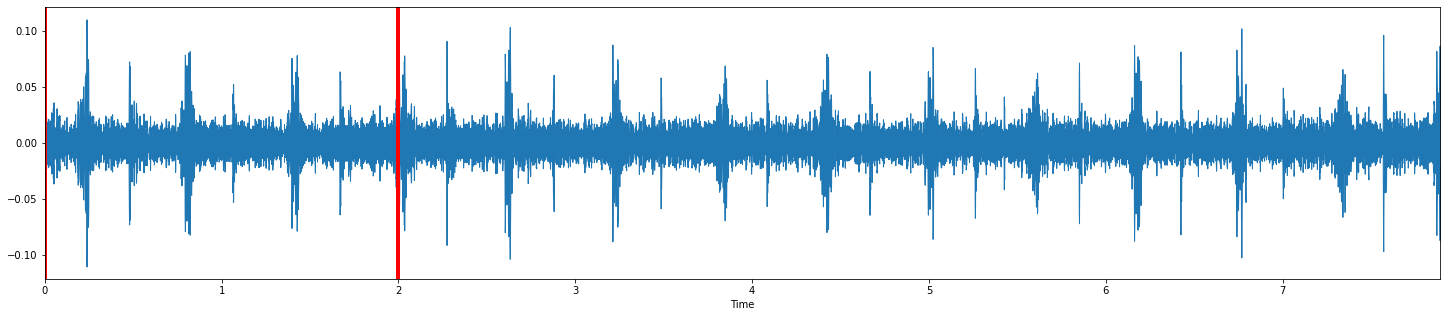

In [224]:
plt.figure(figsize=(25, 5))
sample=[a for a in files_a_list if "normal__201102081321" in a][0]
print(sample)
x,sr=lb.load(sample)
librosa.display.waveplot(x, sr=sr)
for i in range(0,len(y_test)):
    if y_test[i]==1:
        #print(i)
        plt.axvline(x=i,linewidth=4,c="g") 
    if y_predict_test[i]==1:
        #print(i)
        plt.axvline(x=i,linewidth=4,c="r")


In [41]:
y_test.sum()

5262

In [ ]:
## Create a class

In [ ]:

class hb_detection(self):
    __init__(self):
    
    prepare_data(self,audio_file_path,csv_file):
        
        
    
    lgb_fit(self,y_train,y_fit):
    
    lgb_predict(self,y_test):
        
    return y_predict

    xg_fit(self,y_train,y_fit):
        
    xg_predict(self,y_test):
    
        
    
    
    
    
    

## Heartbeat sound classification